In [1]:
## Figure out some of the stats for the individual positions

In [3]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(pd.read_csv(glob.glob(os.path.join(os.path.relpath(os.curdir),'summarized.csv'))[0]))

In [6]:
df.columns

Index(['NAME', 'POS', 'years', 'FPTS, mean', 'FPTS, std', 'RK, mean',
       'RK, std', 'Rank', 'Avg_pick', 'ADP'],
      dtype='object')

In [22]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'above_%s_percentile' % n
    return percentile_

In [45]:
stats=df.groupby(['POS']).agg({'FPTS, mean':['mean','std',percentile(80),percentile(60),percentile(40)]}).round(1)
print(stats)
#print(stats.index)
#print(stats.columns)
#print(stats.loc['QB',('FPTS, mean', 'top_80_percentile')])

    FPTS, mean                                                            
          mean   std top_80_percentile top_60_percentile top_40_percentile
POS                                                                       
FB        69.5   NaN              69.5              69.5              69.5
QB       213.5  77.3             275.4             234.0             208.1
RB       142.0  69.7             187.9             139.4             119.4
TE        97.5  45.4             132.0             103.9              71.7
WR       134.1  62.6             201.1             136.3             111.0
Index(['FB', 'QB', 'RB', 'TE', 'WR'], dtype='object', name='POS')
MultiIndex(levels=[['FPTS, mean'], ['mean', 'std', 'top_80_percentile', 'top_60_percentile', 'top_40_percentile']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]])
275.4


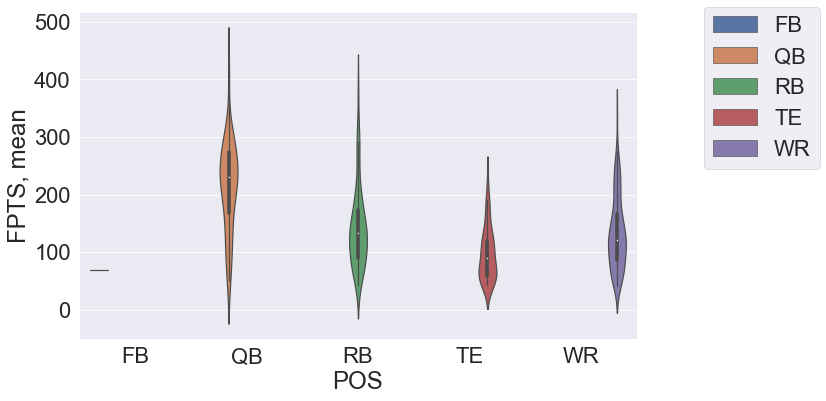

In [35]:
import seaborn as sns
sns.set(context='paper',font_scale=2.5)
fig,ax = plt.subplots(figsize=(10,6))
sns.violinplot(x=df['POS'],y=df['FPTS, mean'], hue=df['POS'])
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [54]:
for pstn in set(df['POS']):
    #print(stats.loc['QB',('FPTS, mean', 'top_80_percentile')])
    top80 = (stats.loc[pstn,('FPTS, mean', 'top_80_percentile')])
    top60 = (stats.loc[pstn,('FPTS, mean', 'top_60_percentile')])
    top40 = (stats.loc[pstn,('FPTS, mean', 'top_40_percentile')])
    for ix, row in df.iterrows():         
        df.loc[df['POS']==pstn, 'Percentile'] = np.where(df.loc[df['POS']==pstn,df['FPTS, mean'] < top40],'bttm', np.where(df.loc[df['POS']==pstn, np.logical_and(df['FPTS, mean'] < top40, df['FPTS, mean'] > top60)],'top60', np.where(df.loc[df['POS']==pstn, np.logical_and(df['FPTS, mean'] > top60, df['FPTS, mean'] < top80)],'top40','top20')))

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match